In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/final_playlist.csv')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635 entries, 0 to 4634
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4635 non-null   float64
 1   energy            4635 non-null   float64
 2   loudness          4635 non-null   float64
 3   speechiness       4635 non-null   float64
 4   acousticness      4635 non-null   float64
 5   instrumentalness  4635 non-null   float64
 6   liveness          4635 non-null   float64
 7   valence           4635 non-null   float64
 8   tempo             4635 non-null   float64
 9   id                4635 non-null   object 
 10  duration_ms       4635 non-null   int64  
 11  names             4635 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 434.7+ KB


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,1VU8t2MpJRLG5iFEIxqq7z,230467,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,4YRvb9B8cgvhst11qk8CKn,360147,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,7qiZfU4dY1lWllzX7mPBI3,233713,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,0E9ZjEAyAwOXZ7wJC0PD33,184560,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,4OSBTYWVwsQhGLF9NHvIbR,228093,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,1Wl0fMRT0YzndDmHZCFvoT,131294,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,6DGIg7YNSXWz1SAnJ1S8bX,278719,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,6WzGciwEdqlkPuMf3bDmX7,157192,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,2IJZWPp6TnMWHyGqjrz3Ci,375361,Roadtrip - Moritz Hofbauer Remix


In [3]:
# Select relevant acoustic features for clustering
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
X

array([[-0.92580149,  0.90620772,  0.50309949, ..., -0.64223442,
        -1.13066626,  0.40725424],
       [-0.07075464, -1.66061727, -0.78531106, ..., -1.49767424,
        -0.08355486,  2.47123471],
       [ 1.0800227 , -0.18305396,  0.95732044, ...,  1.62287385,
        -0.98161553,  0.45891741],
       ...,
       [ 0.212118  ,  0.17499039, -0.49894386, ..., -0.16029649,
         1.04717218, -0.75898704],
       [-0.19933311, -0.07211064, -0.69195148, ..., -1.91977155,
         0.10771688,  2.71337998],
       [ 0.88715499,  0.12960448, -0.6675232 , ...,  0.46622282,
         0.07128059,  0.46857839]])

## K-Means Clustering

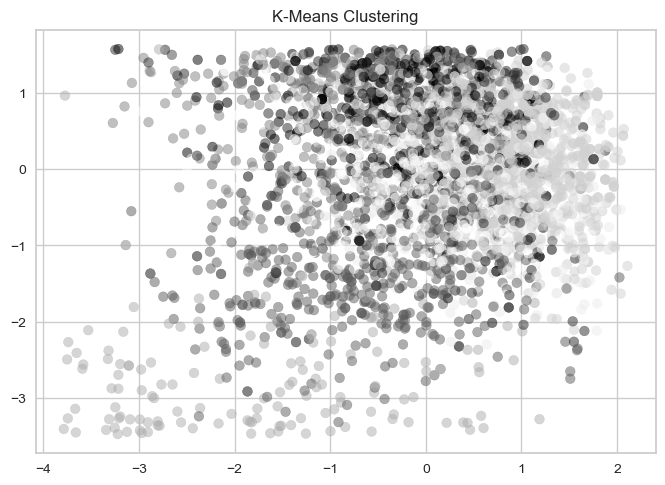

In [28]:
from sklearn.cluster import KMeans
# Set number of clusters
kmeans = KMeans(n_clusters=8)
# Fit the model
kmeans.fit(X)
# Predict cluster labels
pred = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('K-Means Clustering')
plt.show()

In [30]:
# Calculate Silhouette Score to evaluate the quality of clustering
from sklearn.metrics import silhouette_score
print("K-Means Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

K-Means Silhouette Score: 0.14223981740802955


Since the K-Means Silhoutte score is 0.128 and thus really low and indicating that the clustering may not be very effective at grouping the songs into well-defined clusters.

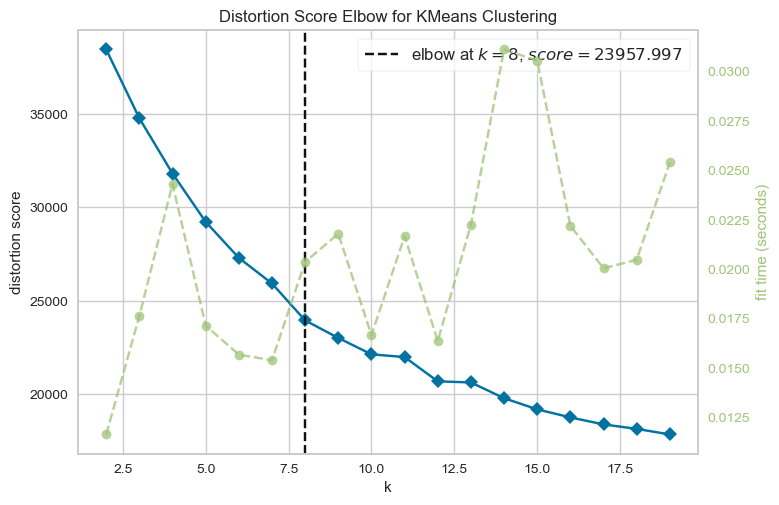

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer

# Use KElbowVisualizer to find the optimal number of clusters for KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.show()

## Agglomerative Clustering

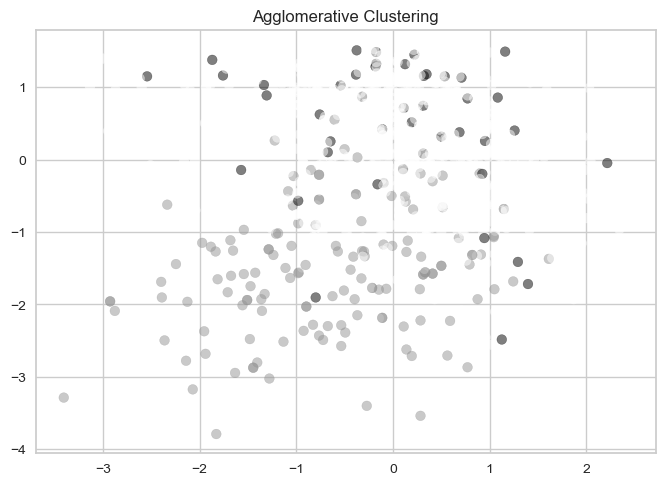

In [143]:
from sklearn import cluster

# Agglomerative Clustering with 'ward' linkage
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
pred = agglomerative.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.show()

In [144]:
# Calculate Silhouette Score
print("Agglomerative Clustering Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

Agglomerative Clustering Silhouette Score: 0.25203026452954236


Agglomerative Clustering Silhouette Score of 0.252 is a slight improvement on the k-means result.

In [145]:
# Try different linkage methods for Agglomerative Clustering
linkages = ['ward', 'single', 'complete', 'average']

for linkage in linkages:
    agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage=linkage)
    pred = agglomerative.fit_predict(X)
    score = silhouette_score(X, pred, metric='euclidean')
    print(f"Linkage: {linkage}, Silhouette Score: {score}")

Linkage: ward, Silhouette Score: 0.25203026452954236
Linkage: single, Silhouette Score: 0.45701724757733464
Linkage: complete, Silhouette Score: 0.15880624243472122
Linkage: average, Silhouette Score: 0.4332168938963849


With a linkage = single, the silhouette score performs the best at 0.
but single is not appropriate
so, we take 2nd best silhouette score of 0.4332168938963849 for average

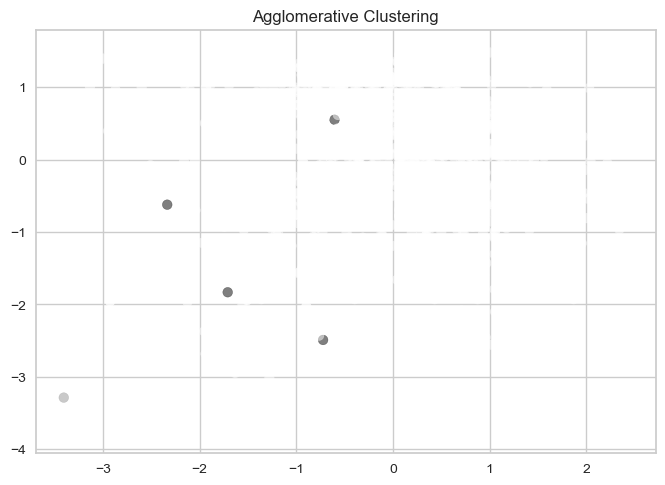

In [146]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
pred = agglomerative.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.show()

In [147]:
pred

array([0, 0, 0, ..., 0, 0, 0])

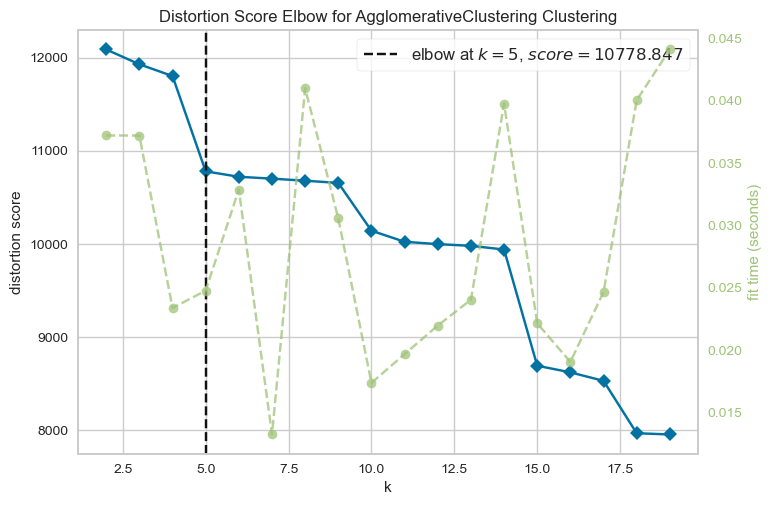

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [148]:
from yellowbrick.cluster import KElbowVisualizer

# Elbow Method for finding the optimal number of clusters
model = cluster.AgglomerativeClustering(linkage='average')
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.show()

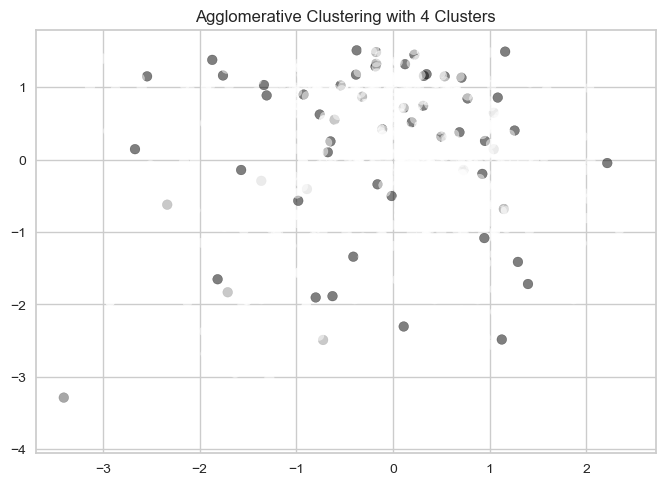

In [149]:
# Use 4 clusters as indicated by the Elbow Method
agglomerative = cluster.AgglomerativeClustering(n_clusters=5, linkage='average')
pred_5 = agglomerative.fit_predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=pred_5, alpha=0.5)
plt.title('Agglomerative Clustering with 4 Clusters')
plt.show()

In [150]:
# Calculate the Silhouette Score for 5 clusters
sil_score_5 = silhouette_score(X, pred_5, metric='euclidean')
print(f"Silhouette Score for Agglomerative Clustering with 15 Clusters: {sil_score_5}")

Silhouette Score for Agglomerative Clustering with 15 Clusters: 0.3264895535839765


ideal clustering = 3, linkage = average with 0.4332 as Silhouette Score

In [34]:
display(pred)

array([0, 6, 2, ..., 4, 6, 2], dtype=int32)

In [36]:
unique = np.unique(pred)
unique

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [38]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,1VU8t2MpJRLG5iFEIxqq7z,230467,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,4YRvb9B8cgvhst11qk8CKn,360147,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,7qiZfU4dY1lWllzX7mPBI3,233713,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,0E9ZjEAyAwOXZ7wJC0PD33,184560,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,4OSBTYWVwsQhGLF9NHvIbR,228093,Rolling in the Deep
...,...,...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,1Wl0fMRT0YzndDmHZCFvoT,131294,Roadtrip
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,6DGIg7YNSXWz1SAnJ1S8bX,278719,Paradise
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,6WzGciwEdqlkPuMf3bDmX7,157192,Roadtrip
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,2IJZWPp6TnMWHyGqjrz3Ci,375361,Roadtrip - Moritz Hofbauer Remix


In [40]:
columns = ["id","names"]
name = df[columns]
name

,id,names
0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
...,...,...
4630,1Wl0fMRT0YzndDmHZCFvoT,Roadtrip
4631,6DGIg7YNSXWz1SAnJ1S8bX,Paradise
4632,6WzGciwEdqlkPuMf3bDmX7,Roadtrip
4633,2IJZWPp6TnMWHyGqjrz3Ci,Roadtrip - Moritz Hofbauer Remix


In [42]:
features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

features = df[features]
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.3670,92.009,230467
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.1540,119.885,360147
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.9310,95.977,233713
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.1630,125.905,184560
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.5070,104.948,228093
...,...,...,...,...,...,...,...,...,...,...
4630,0.719,0.580,-6.173,0.0903,0.08180,0.812000,0.1170,0.4900,170.099,131294
4631,0.449,0.585,-6.761,0.0268,0.05090,0.000087,0.0833,0.2120,139.631,278719
4632,0.690,0.723,-9.204,0.0639,0.17400,0.000000,0.2550,0.4870,149.987,157192
4633,0.626,0.674,-10.002,0.0411,0.00237,0.863000,0.1060,0.0489,124.977,375361


In [44]:
features["cluster"] = pred


/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_53703/2072673538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["cluster"] = pred


In [46]:
df = pd.concat([features, name], axis = 1)

In [48]:
display(df.head(50))

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id,names
0,0.513,0.868,-5.061,0.0410,0.01850,0.000000,0.1210,0.367,92.009,230467,0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben
1,0.646,0.359,-10.388,0.1550,0.24700,0.914000,0.0872,0.154,119.885,360147,6,4YRvb9B8cgvhst11qk8CKn,Sonnentanz
2,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713,2,7qiZfU4dY1lWllzX7mPBI3,Shape of You
3,0.694,0.770,-5.335,0.1490,0.17600,0.000011,0.1180,0.163,125.905,184560,0,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind
4,0.730,0.769,-5.114,0.0298,0.13800,0.000000,0.0473,0.507,104.948,228093,0,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep
5,0.655,0.797,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360,4,6habFhsOp2NvshLv26DqMb,Despacito
6,0.591,0.176,-11.692,0.0396,0.63800,0.000005,0.2520,0.296,152.122,299147,5,1f1wT6Q7Buxb3OD0BqMW8O,"I See Fire - From ""The Hobbit - The Desolation..."
7,0.422,0.264,-7.064,0.0322,0.92200,0.000000,0.1320,0.331,119.930,269560,5,3U4isOIWM3VvDubwSI3y7a,All of Me
8,0.577,0.385,-6.362,0.0300,0.37100,0.000000,0.2310,0.331,95.820,215733,5,2VxeLyX666F8uXCJ0dZF8B,Shallow
9,0.599,0.448,-6.312,0.0232,0.16300,0.000000,0.1060,0.168,95.050,263400,0,0tgVpDi06FyKpA1z0VMD4v,Perfect


In [50]:
df.cluster.value_counts()

cluster
2    1294
0     960
4     542
7     537
5     460
1     390
6     300
3     152
Name: count, dtype: int64

In [53]:
df.to_csv('playlist5000_final.csv', index=False)

In [306]:

# Select columns to pivot (all features except 'cluster' and other non-numeric columns)
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Use pd.melt to pivot the data
#df_melted = pd.melt(df, 
                   # id_vars=['cluster', 'id', 'names'],  # Columns to keep
                  #  value_vars=features,                # Columns to unpivot
                  #  var_name='feature',                 # New column name for features
                   # value_name='value')                 # New column name for values

# Save the pivoted data to a new CSV if needed
#df_melted.to_csv('playlist5000_final_long.csv', index=False)

# Display the first few rows of the pivoted DataFrame
df_melted.head()

,cluster,id,names,feature,value
0,0,1VU8t2MpJRLG5iFEIxqq7z,Geboren um zu leben,danceability,0.513
1,6,4YRvb9B8cgvhst11qk8CKn,Sonnentanz,danceability,0.646
2,2,7qiZfU4dY1lWllzX7mPBI3,Shape of You,danceability,0.825
3,0,0E9ZjEAyAwOXZ7wJC0PD33,In My Mind,danceability,0.694
4,0,4OSBTYWVwsQhGLF9NHvIbR,Rolling in the Deep,danceability,0.730


In [608]:
import config
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


In [145]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [234]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("kmeans_model.pkl", "rb") as f:
    kmeans = pickle.load(f)

In [558]:
song_name = input("Insert the name of a song: ")

Insert the name of a song:  ain't no sunshine


In [610]:
import unicodedata

# Cache dictionary to store results
cache = {}

def get_audio_features(song_name, limit=1, market="DE"):
    # Normalize and lowercase song_name for consistent caching
    normalized_name = unicodedata.normalize('NFKC', song_name).lower()
    
    if normalized_name in cache:
        return cache[normalized_name]


    result = sp.search(q=song_name, limit=1, market=market)
    if result["tracks"]["items"]:
        song_id = result["tracks"]["items"][0]["id"]
        features = sp.audio_features(song_id)
        cache[normalized_name] = (features, song_id, result)

        return features, song_id, result
    else:
        return None, None, None

In [612]:
from IPython.display import IFrame

def bring_song(song_name):
    features, song_id, result = get_audio_features(song_name)
    for item in result['tracks']['items']:
        print("The name of song is: '{}' and the id is: {}".format(item['name'],item["id"]))
    view = IFrame(src="https://open.spotify.com/embed/track/"+song_id,
            width="320",
            height="80",
            frameborder="0",
            allowtransparency="true",
            allow="encrypted-media",
            )
    return view

chosen_song = bring_song(song_name)
chosen_song

The name of song is: 'Ain't No Sunshine' and the id is: 1k1Bqnv2R0uJXQN4u6LKYt


In [614]:
def classify_song(song_name):
    features, song_id, result = get_audio_features(song_name)
    X = pd.DataFrame(features)
    X = X[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence','tempo', 'duration_ms']]

    scaled_X = scaler.transform(X)   
    
    predicted_cluster = kmeans.predict(scaled_X)[0]
    print("The name of the song is: '{}' and the id is: {}".format(
        result["tracks"]["items"][0]['name'],  
        song_id))
    print("the predicted cluster is: ")
    return predicted_cluster


In [616]:
answer = classify_song(song)

answer

The name of the song is: 'Ain't No Sunshine' and the id is: 1k1Bqnv2R0uJXQN4u6LKYt
the predicted cluster is: 


5

In [437]:
df = pd.read_csv('../data/playlist5000_final.csv')

In [618]:
def song_recommender(classification):
    features, song_id, result = get_audio_features(song_name)
    X = pd.DataFrame(features)
    X = X[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
    scaled_X = scaler.transform(X)   
    predicted_cluster = kmeans.predict(scaled_X)[0]
    same_cluster_songs = df.loc[df['cluster'] == predicted_cluster]
    random_sample = same_cluster_songs.sample(n=1)
    

    recommended_song_name = random_sample['names'].values[0]
    recommended_song_id = random_sample['id'].values[0]
    
    print(f"Recommended song: '{recommended_song_name}' from the same cluster.")
    
    view = IFrame(
        src=f"https://open.spotify.com/embed/track/{recommended_song_id}",
        width="320", height="80",
        frameborder="0", allowtransparency="true", allow="encrypted-media"
    )
    
    return view

# Example usage
recommend = song_recommender(classification)
recommend


Recommended song: 'You’re My Heart, You’re My Soul' from the same cluster.


In [439]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'cluster', 'id', 'names'],
      dtype='object')